# 2110446 DATA SCIENCE AND DATA ENGINEERING

## **Unit 03:** Traditional Machine Learning

- **Problem:** RF and GridSearchCV (`03_ml_01_2025s2`)
- **Author:** Worralop Srichainont
- **Year:** 2025 (Semester 2)

# Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score

# Data Resources

File URL

In [ ]:
FILE_PATH = "https://drive.google.com/uc?id=1dHLr9z9AiL5jtLqYDeWmmGhPAKPpBDcS"

Load files

In [3]:
df = pd.read_csv(FILE_PATH)

Display `DataFrame`

In [4]:
df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


# Problem `Q1`

Before doing the data preparation, how many missing value are there in `gill-size` variables?

In [ ]:
TARGET_COLS = "gill-size"

In [6]:
missing_values = df[TARGET_COLS].isna().sum()
print(f"There are {missing_values} missing values in {TARGET_COLS} column.")

There are 121 missing values in gill-size column.


# Problem `Q2`

How many rows of data and variables after doing these operations?

- Drop rows where the target (`label`) variable is missing.
- Drop the following variables:
    - `id`
    - `gill-attachment`
    - `gill-spacing`
    - `gill-size`
    - `gill-color-rate`
    - `stalk-root`
    - `stalk-surface-above-ring`
    - `stalk-surface-below-ring`
    - `stalk-color-above-ring-rate`
    - `stalk-color-below-ring-rate`
    - `veil-color-rate`
    - `veil-type`
- Examine the number of rows, the number of digits, and whether any are missing.

## Drop Rows

Display rows with missing `label` variable.

In [7]:
df[df["label"].isna()].head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
145,146,NaN,x,y,t,n,f,c,b,t,...,o,p,n,y,d,5.0,4.0,1.0,3.0,5.0
146,147,NaN,x,f,t,n,f,c,b,t,...,o,p,k,v,d,1.0,5.0,1.0,2.0,4.0
147,148,NaN,f,f,t,n,f,c,b,t,...,o,p,n,y,d,1.0,4.0,1.0,1.0,1.0
148,149,NaN,f,f,t,n,f,c,b,t,...,o,p,k,v,d,1.0,4.0,1.0,2.0,1.0
149,150,NaN,f,f,t,n,f,c,b,t,...,o,p,k,y,d,4.0,1.0,1.0,1.0,1.0


Drop rows where the `label` variable is missing.

In [ ]:
TARGET_COLS = ["label"]

In [ ]:
df = df.dropna(subset=TARGET_COLS)

## Drop Columns

Drop the following columns.

In [ ]:
TARGET_COLS = [
    "id",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color-rate",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring-rate",
    "stalk-color-below-ring-rate",
    "veil-color-rate",
    "veil-type",
]

In [ ]:
df = df.drop(columns=TARGET_COLS)

## Display Shape

Display shape of the modified `DataFrame`

In [ ]:
print(f"The shape of the DataFrame is {df.shape}")
print(f"- It has {df.shape[0]} rows.")
print(f"- It has {df.shape[1]} columns.")

The shape of the DataFrame is (5764, 12)
- It has 5764 rows.
- It has 12 columns.


# Problem Q3

Answer the quantity of `class_0` and `class_1` after doing operations in `Q2` and these following operations.

- Fill missing values by adding the mean for numeric variables and the mode for nominal variables.
- Convert the label variable `e` (edible) to `1` and `p` (poisonous) to `0` and check the quantity of `class_0` and `class_1`.

## Mean Filling

Choose numeric column to fill missing values.

In [ ]:
NUMERIC_COLS = ["cap-color-rate"]

DISPLAY_COLS = ["cap-color-rate", "label", "cap-shape", "cap-surface"]

Display missing values on numeric column.

In [14]:
display_indices = df[df[NUMERIC_COLS].isna().any(axis=1)].index

df.loc[display_indices, DISPLAY_COLS].head()

,cap-color-rate,label,cap-shape,cap-surface
2896,NaN,p,f,NaN
2897,NaN,e,k,NaN
2898,NaN,p,x,NaN
2899,NaN,p,f,NaN
2900,NaN,p,f,NaN


Fill missing value with mean.

In [ ]:
mean_value = df[NUMERIC_COLS].mean()

df[NUMERIC_COLS] = df[NUMERIC_COLS].fillna(mean_value)

Check if the missing rows has already filled.

In [16]:
df.loc[display_indices, DISPLAY_COLS].head()

,cap-color-rate,label,cap-shape,cap-surface
2896,3.327523,p,f,NaN
2897,3.327523,e,k,NaN
2898,3.327523,p,x,NaN
2899,3.327523,p,f,NaN
2900,3.327523,p,f,NaN


## Mode Filling

Choose categorical columns to fill missing values.

In [ ]:
CATEGORICAL_COLS = [
    "cap-shape",
    "cap-surface",
    "bruises",
    "odor",
    "stalk-shape",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

Display missing value on categorical columns.

In [18]:
missing_indices = df[df[CATEGORICAL_COLS].isna().any(axis=1)].index

df.loc[missing_indices, CATEGORICAL_COLS].sample(n=10, random_state=67)

,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat
2974,x,y,NaN,NaN,NaN,o,e,w,v,l
2945,x,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p
2960,f,s,NaN,NaN,NaN,o,p,h,v,g
2992,x,y,NaN,NaN,NaN,o,e,w,v,d
5670,x,s,NaN,NaN,e,o,p,y,c,l
2950,x,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
79,x,f,t,n,NaN,NaN,NaN,NaN,NaN,NaN
89,x,y,t,n,NaN,NaN,NaN,NaN,NaN,NaN
2977,k,y,NaN,NaN,NaN,o,e,w,v,d
2916,k,NaN,t,n,e,t,e,w,c,w


Fill missing value with mode.

Note that `.mode()` of each column returns as a series (`pd.Series`); hence, we need to use `.iloc[0]` to select only the first mode value of every columns.

In [ ]:
mode_values = df[CATEGORICAL_COLS].mode().iloc[0]

df[CATEGORICAL_COLS] = df[CATEGORICAL_COLS].fillna(mode_values)

Check if the missing rows has already filled.

In [20]:
df.loc[missing_indices, CATEGORICAL_COLS].sample(n=10, random_state=67)

,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat
2974,x,y,f,n,t,o,e,w,v,l
2945,x,y,f,n,t,o,p,w,v,p
2960,f,s,f,n,t,o,p,h,v,g
2992,x,y,f,n,t,o,e,w,v,d
5670,x,s,f,n,e,o,p,y,c,l
2950,x,s,f,n,t,o,p,w,v,g
79,x,f,t,n,t,o,p,w,v,d
89,x,y,t,n,t,o,p,w,v,d
2977,k,y,f,n,t,o,e,w,v,d
2916,k,y,t,n,e,t,e,w,c,w


## Convert Label

Display label column before converting

In [ ]:
df["label"].head()

,label
0,p
1,e
2,e
3,p
4,e


Create mappings to convert label variable

In [ ]:
MAPPINGS = {"e": 1, "p": 0}

Apply the mappings to do as follows:
- Convert edible class (`e`) to `1`
- Convert poisonous class (`p`) to `0`

In [ ]:
df["label"] = df["label"].map(MAPPINGS)

Display label column after converting

In [ ]:
df["label"].head()

,label
0,0
1,1
2,1
3,0
4,1


## Count Label

In [ ]:
n_positive = (df["label"] == 1).sum()
n_negative = (df["label"] == 0).sum()

In [26]:
print(f"- The dataset has {n_negative} poisonous class.")
print(f"- The dataset has {n_positive} edible class.")

- The dataset has 3660 poisonous class.
- The dataset has 2104 edible class.


# Problem `Q4`

What are training dataset's shape (`X_train`) and testing dataset's shape (`X_test`) after doing all operations in `Q2` to `Q3` and all of these following operations.

- Convert the nominal variable to numeric using a dummy code with `drop_first = True`.
- Split train/test with 20% test, stratify, and seed = 2020.

## One-Hot Encoding

Choosing all categorical columns

In [ ]:
CATEGORICAL_COLS = [
    "cap-shape",
    "cap-surface",
    "bruises",
    "odor",
    "stalk-shape",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

Display columns before applying one-hot encoding.

In [28]:
DISPLAY_COLS = ["ring-number"]

In [ ]:
df[DISPLAY_COLS].sample(n=5, random_state=67)

,ring-number
1360,o
4815,o
1254,o
3243,o
886,o


Apply one-hot encoding using `get_dummies()` from `pandas` library.

Make sure to use `drop_first=True` to get `k-1` columns instead of `k`.

In [30]:
df = pd.get_dummies(df, columns=CATEGORICAL_COLS, drop_first=True, dtype=int)

Display columns after applying one-hot encoding.

In [ ]:
DISPLAY_COLS = [
    "ring-number_o",
    "ring-number_t",
]

In [32]:
df.sample(n=5, random_state=67)

,label,cap-color-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1360,1,5.0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4815,0,5.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1254,0,6.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3243,0,2.0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
886,1,4.0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [33]:
df[DISPLAY_COLS].sample(n=5, random_state=67)

,ring-number_o,ring-number_t
1360,1,0
4815,1,0
1254,1,0
3243,1,0
886,1,0


# Dataset Splitting

First, we separate the original `DataFrame` into:
- `X` is the features which are all column except the `label` column.
- `y` is the target which is only `label` column.

In [34]:
X = df.drop(columns=["label"])
y = df["label"]

Then, split the dataset into train dataset and test dataset by ratio `8:2`:
- **Train dataset** (80% of the dataset) uses for training the model.
- **Test dataset** (20% of the dataset) uses for testing the model.

**Stratification** can ensure that both train datasets and test dataset have the same `edible` and `poisonous` proportions.

To split dataset, use `train_test_split()` function from `sklearn.model_selection`.
- `test_size` is the percentage of test dataset.
- `random_state` is random seed for ensuring the same result when running the code.
- Pass target to `stratify` parameter.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020, stratify=y
)

Display shape of the train dataset (`X_train`), and test dataset (`X_test`)

In [ ]:
print(f"The shape of train dataset (X_train) is {X_train.shape}.")
print(f"The shape of test dataset (X_test) is {X_test.shape}.")

The shape of train dataset (X_train) is (4611, 42).
The shape of test dataset (X_test) is (1153, 42).


# Problem `Q5`

Find the best parameter for Random Forest model using Grid Search on training data with 5 CV after complete all process in `Q2` to `Q4`.

## GridSearchCV

Initialize parameters to try and compare using grid search algorithm to find parameters that makes model perform the best.

In [ ]:
PARAM_GRID = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3],
    "min_samples_leaf": [2, 5],
    "n_estimators": [100],
    "random_state": [2020],
}

Initialize a `GridSearchCV` object for Random Forest model
- `estimator` is the model we want.
- `param_grid` is the dict of parameters we want to try and compare.
- `cv` is the cross validation folds.
- `n_jobs` is amount of job running in parallel. (`-1` means uses all processor.)
- `scoring` is the evaluation metrics to compare model performance.

In [ ]:
model = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=PARAM_GRID,
    cv=5,
    n_jobs=-1,
    scoring="f1_weighted",
)

Call `.fit()` to actually begin trying to train multiple models using train dataset with different parameters, then compare for the best model.

In [39]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [2, 5], 'n_estimators': [100],
                         'random_state': [2020]},
             scoring='f1_weighted')

## Best Model Parameters

Display `GridSearchCV` results

In [40]:
pd.DataFrame.from_dict(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.341085,0.012398,0.024733,0.000442,gini,2,2,100,2020,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.962964,0.962027,0.970743,0.959831,0.953435,0.961800,0.005572,5
1,0.343081,0.017748,0.024112,0.001518,gini,2,5,100,2020,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.962964,0.962027,0.970743,0.959831,0.953435,0.961800,0.005572,5
2,0.350649,0.008797,0.027621,0.002875,gini,3,2,100,2020,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.980498,0.970812,0.974017,0.975151,0.958934,0.971882,0.007187,1
3,0.358112,0.010284,0.026300,0.003377,gini,3,5,100,2020,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.979408,0.970812,0.974017,0.976211,0.958934,0.971877,0.007053,2
4,0.346945,0.007155,0.024577,0.001964,entropy,2,2,100,2020,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.964066,0.962027,0.969669,0.957660,0.952366,0.961158,0.005851,7
5,0.341370,0.019228,0.024814,0.000692,entropy,2,5,100,2020,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.964066,0.962027,0.969669,0.957660,0.952366,0.961158,0.005851,7
6,0.377416,0.008397,0.029229,0.005029,entropy,3,2,100,2020,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.975104,0.969740,0.974017,0.977349,0.958934,0.971029,0.006534,3
7,0.425557,0.071295,0.029519,0.006510,entropy,3,5,100,2020,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.975104,0.969740,0.972943,0.975205,0.958934,0.970385,0.006060,4


Display the best parameters for random forest model.

In [41]:
best_params_df = pd.DataFrame.from_dict(
    model.best_params_, orient="index", columns=["value"]
)

best_params_df

,value
criterion,gini
max_depth,3
min_samples_leaf,2
n_estimators,100
random_state,2020


Get tuple of all parameters values.

In [ ]:
best_params = tuple(model.best_params_.values())

print(best_params)

('gini', 3, 2, 100, 2020)


# Problem `Q6`

After doing all process in `Q2` to `Q5`, what is the value of macro F1 score rounded to 2 decimal places?

## Model Prediction

Uses model from problem `Q5` to predict the test dataset.

In [43]:
y_pred = model.predict(X_test)

## Confusion Matrix

Given edible (`1`) is the `positive` class, and poisonous (`0`) is `negative` class.
- **True Positive (TP)** means predicted `positive`, actual `positive`.
- **False Positive (FP)** means predicted `positive`, actual `negative`.
- **True Negative (TN)** means predicted `negative`, actual `negative`.
- **False Negative (FN)** means predicted `negative`, actual `positive`.

**NOTE:** `cmap` parameter is the color map of the visualization.

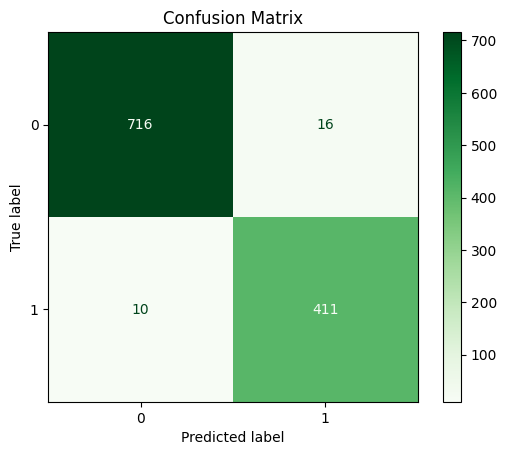

In [44]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap=plt.cm.Greens
)

plt.title("Confusion Matrix")
plt.show()

## Classification Report

**Class Metrics**
- **Precision** is the proportions of true positive (TP) by total positive predictions.
- **Recall** is the proportions of true positive (TP) by total actual positive.
- **Support** is the amount of actual data in the class.
- **F1 Score** is the harmonic mean of **Precision** and **Recall**

**Overall Metrics**
- **Accuracy** is the proportions of correct predictions by total predictions.
- **Macro F1 Score** is mean of per-class F1 score.
- **Weight Average F1 Score** is mean of per-class F1 score weighted by each class's support.

**NOTE:** `digits` parameter is the decimal places to display.

In [ ]:
report = classification_report(y_test, y_pred, digits=4)

print(report)

              precision    recall  f1-score   support

           0     0.9862    0.9781    0.9822       732
           1     0.9625    0.9762    0.9693       421

    accuracy                         0.9775      1153
   macro avg     0.9744    0.9772    0.9758      1153
weighted avg     0.9776    0.9775    0.9775      1153



To get only F1 score, you can use `f1_score` from `sklearn.metrics`

Make sure to set `average=None` to get per-class F1 score.

In [46]:
# Get a list of per-class F1 score.
f1_scores = f1_score(y_test, y_pred, average=None)

# Rounded to 2 decimal places and store it in the tuple.
f1_scores = tuple(round(float(score), 2) for score in f1_scores)

# Display F1 scores.
print(f"The per-class F1 score are {f1_scores}")
print(f"- The negative class F1 score is {f1_scores[0]}")
print(f"- The positive class F1 score is {f1_scores[1]}")

The per-class F1 score are (0.98, 0.97)
- The negative class F1 score is 0.98
- The positive class F1 score is 0.97


# Grader

## Solution

Writing all problem inside the `MushroomClassifier` class, and then send them to the grader.

In [47]:
class MushroomClassifier:
    def __init__(self, data_path):
        # Initialization attributes
        self.data_path = data_path
        self.df = pd.read_csv(data_path)

        # Additional attributes
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None

        self.model = None
        self.y_pred = None

    def Q1(self):
        """
        Q1: Before doing the data preparation,
            how many missing value are there in "gill-size" variables?
        """
        missing_values = self.df["gill-size"].isna().sum()
        return missing_values

    def Q2(self):
        """
        Q2: How many rows of data and variables after doing these operations?
            - Drop rows where the target ("label") variable is missing.
            - Drop the following variables:
                - id
                - gill-attachment
                - gill-spacing
                - gill-size
                - gill-color-rate
                - stalk-root
                - stalk-surface-above-ring
                - stalk-surface-below-ring
                - stalk-color-above-ring-rate
                - stalk-color-below-ring-rate
                - veil-color-rate
                - veil-type
        """
        # Drop rows where the target ("label") variable is missing.
        self.df = self.df.dropna(subset=["label"])

        # Drop the following columns.
        TARGET_COLS = [
            "id",
            "gill-attachment",
            "gill-spacing",
            "gill-size",
            "gill-color-rate",
            "stalk-root",
            "stalk-surface-above-ring",
            "stalk-surface-below-ring",
            "stalk-color-above-ring-rate",
            "stalk-color-below-ring-rate",
            "veil-color-rate",
            "veil-type",
        ]
        self.df = self.df.drop(columns=TARGET_COLS, errors="ignore")

        # Return shape of the new DataFrame
        return self.df.shape

    def Q3(self):
        """
        Q3: Answer the quantity of "class_0" and "class1"  after doing operations
            in Q2 and these following operations.
            -   Fill missing values by adding the mean for numeric variables
                and the mode for nominal variables.
            -   Convert the label variable `e` (edible) to `1` and `p` (poisonous) to `0`
                and check the quantity of `class0` and `class1`.
        """
        # Ensure that all processes in Q2 has already executed.
        self.Q2()

        # Fill missing value on numerical columns with mean.
        NUMERIC_COLS = ["cap-color-rate"]
        mean_value = self.df[NUMERIC_COLS].mean()
        self.df[NUMERIC_COLS] = self.df[NUMERIC_COLS].fillna(mean_value)

        # Fill missing value on categorical columns with mode.
        CATEGORICAL_COLS = [
            "cap-shape",
            "cap-surface",
            "bruises",
            "odor",
            "stalk-shape",
            "ring-number",
            "ring-type",
            "spore-print-color",
            "population",
            "habitat",
        ]
        mode_values = self.df[CATEGORICAL_COLS].mode().iloc[0]
        self.df[CATEGORICAL_COLS] = self.df[CATEGORICAL_COLS].fillna(mode_values)

        # Convert targets (label) into numerical values.
        MAPPINGS = {"e": 1, "p": 0}
        self.df["label"] = self.df["label"].map(MAPPINGS)

        # Count positive and negative class
        n_positive = (self.df["label"] == 1).sum()
        n_negative = (self.df["label"] == 0).sum()

        # Return counts as a tuple
        return (n_negative, n_positive)

    def Q4(self):
        """
        Q4: What are training dataset's shape ("X_train")
            and testing dataset's shape ("X_test")
            after doing all operations in Q2 to Q3
            and all of these following operations.
            -   Convert the nominal variable to numeric using
                a dummy code with `drop_first = True`.
            -   Split train/test with 20% test, stratify,
                and seed = 2020.
        """
        # Ensure that all processes in Q2 to Q3 has already executed.
        self.Q3()

        # Initialize a list of categorical columns
        CATEGORICAL_COLS = [
            "cap-shape",
            "cap-surface",
            "bruises",
            "odor",
            "stalk-shape",
            "ring-number",
            "ring-type",
            "spore-print-color",
            "population",
            "habitat",
        ]

        # Apply one-hot encoding
        self.df = pd.get_dummies(
            self.df, columns=CATEGORICAL_COLS, drop_first=True, dtype=int
        )

        # Features and target splitting
        X = self.df.drop(columns=["label"])
        y = self.df["label"]

        # Train dataset and test dataset splitting using stratification.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=2020, stratify=y
        )

        # Return a shape of train dataset and test dataset.
        return (self.X_train.shape, self.X_test.shape)

    def Q5(self):
        """
        Q5: Find the best parameter for Random Forest model using Grid Search
            on training data with 5 CV after complete all process in Q2 to Q4.
            Set GridSearchCV parameters as follows:
            - "criterion": ["gini", "entropy"]
            - "max_depth": [2, 3]
            - "min_samples_leaf": [2, 5]
            - "n_estimators": [100]
            - "random_state": [2020]
        """
        # Ensure that all processes in Q2 to Q4 has already executed.
        self.Q4()

        # Initialize parameters for GridSearchCV
        PARAM_GRID = {
            "criterion": ["gini", "entropy"],
            "max_depth": [2, 3],
            "min_samples_leaf": [2, 5],
            "n_estimators": [100],
            "random_state": [2020],
        }

        # Initialize GridSearchCV object
        self.model = GridSearchCV(
            estimator=RandomForestClassifier(),
            param_grid=PARAM_GRID,
            cv=5,
            n_jobs=-1,
            scoring="f1_weighted",
        )

        # Begin grid search algorithm to search for the best model
        self.model.fit(self.X_train, self.y_train)

        # Returns tuple of all parameters values
        best_params = tuple(self.model.best_params_.values())
        return best_params

    def Q6(self):
        """
        Q6: After doing all process in Q2 to Q5, what is the value of
            macro F1 score rounded to 2 decimal places?
        """
        # Ensure that all processes in Q2 to Q5 has already executed.
        self.Q5()

        # Predict the test value using the model
        self.y_pred = self.model.predict(self.X_test)

        # Get a list of per-class F1 score.
        f1_scores = f1_score(self.y_test, self.y_pred, average=None)

        # Rounded to 2 decimal places and store it in the tuple.
        f1_scores = tuple(round(float(score), 2) for score in f1_scores)

        # Returns a tuple of pre-class F1 score.
        return f1_scores

## Run Test

Create a utility class `MushroomClassifierTest` to check if each method in the class works correctly.

Use `assert`, `try` and `except` to check if the result matches.

In [ ]:
class MushroomClassifierTest:
    @staticmethod
    def run_tests():
        MushroomClassifierTest.Q1_test()
        MushroomClassifierTest.Q2_test()
        MushroomClassifierTest.Q3_test()
        MushroomClassifierTest.Q4_test()
        MushroomClassifierTest.Q5_test()
        MushroomClassifierTest.Q6_test()

    @staticmethod
    def Q1_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = 121
            RESULT = model.Q1()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q1 failed with {e}")
            return
        print("Q1 passed.")

    @staticmethod
    def Q2_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = (5764, 12)
            RESULT = model.Q2()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q2 failed with {e}")
            return
        print("Q2 passed.")

    @staticmethod
    def Q3_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = (3660, 2104)
            RESULT = model.Q3()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q3 failed with {e}")
            return
        print("Q3 passed.")

    @staticmethod
    def Q4_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = ((4611, 42), (1153, 42))
            RESULT = model.Q4()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q4 failed with {e}")
            return
        print("Q4 passed.")

    @staticmethod
    def Q5_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = ("gini", 3, 2, 100, 2020)
            RESULT = model.Q5()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q5 failed with {e}")
            return
        print("Q5 passed.")

    @staticmethod
    def Q6_test():
        try:
            model = MushroomClassifier(FILE_PATH)
            KEY = (0.98, 0.97)
            RESULT = model.Q6()
            assert RESULT == KEY, f"Expected {KEY} but got {RESULT}"

        except Exception as e:
            print(f"Q6 failed with {e}")
            return
        print("Q6 passed.")

In [49]:
MushroomClassifierTest.run_tests()

Q1 passed.
Q2 passed.
Q3 passed.
Q4 passed.
Q5 passed.
Q6 passed.
